Dataset Link
https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 300
train_path = "/content/drive/MyDrive/Datasets/Face Mask Dataset/Train"
test_path = "/content/drive/MyDrive/Datasets/Face Mask Dataset/Test"

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR,IMAGE_SIZE,BATCH_SIZE):
  train_datagen = ImageDataGenerator(rescale=(1./255),  #ImageDataGenerator is a class, flow_from_directory is its method
                                     shear_range=0.2,            
                                     zoom_range=0.3,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     brightness_range=[0.2,1.2],
                                     rotation_range=0.2,
                                     horizontal_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='categorical',
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE))

  test_datagen = ImageDataGenerator(rescale=1./255)

  
  test_generator = test_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE))
  
  return train_generator, test_generator

In [ ]:
train_generator,test_generator=train_val_generators(train_path, test_path,IMAGE_SIZE,BATCH_SIZE)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


(64, 300, 300, 3)
[0. 1.]


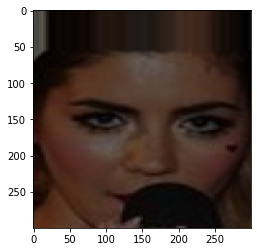

(64, 300, 300, 3)
[0. 1.]


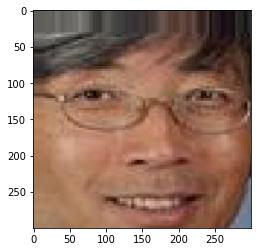

(64, 300, 300, 3)
[0. 1.]


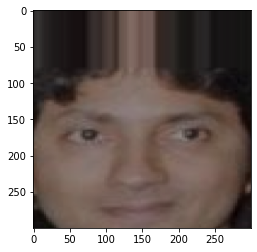

(64, 300, 300, 3)
[1. 0.]


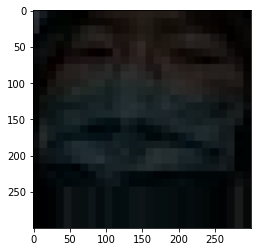

(64, 300, 300, 3)
[1. 0.]


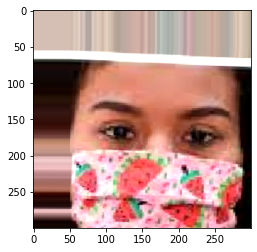

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)  
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [ ]:
class_names = train_generator.class_indices
class_names

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
no_of_classes = len(class_names)
print(f'number of classes : {no_of_classes}')

number of classes : 2


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric

from keras.metrics import binary_crossentropy
# optimization method 
from tensorflow.keras.optimizers import SGD

In [ ]:
# def Alexnet():
# Initialize the model
model = Sequential()

# layer 1: convolutional layer + max-pooling layer
model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (300,300,3)))
model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizer method for estimating the loss function
opt = SGD(lr = 0.1)
model.compile(loss = binary_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])

  # return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 384)       1

In [ ]:
history = model.fit(                   #model.fit()= Returns the loss value and metrics values for the model
    train_generator, 
    validation_data = test_generator, 
    epochs = 3,)

Epoch 1/3
157/157 [==============================] - 2079s 13s/step - loss: 0.7859 - accuracy: 0.5543 - val_loss: 0.6896 - val_accuracy: 0.5131
Epoch 2/3
157/157 [==============================] - 1667s 11s/step - loss: 0.6820 - accuracy: 0.5598 - val_loss: 0.5917 - val_accuracy: 0.9042
Epoch 3/3
157/157 [==============================] - 1712s 11s/step - loss: 0.6702 - accuracy: 0.5897 - val_loss: 0.4449 - val_accuracy: 0.8831


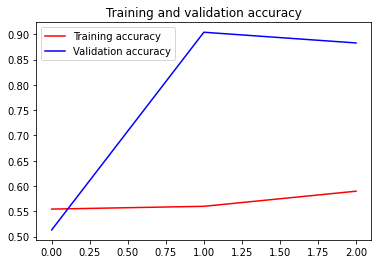

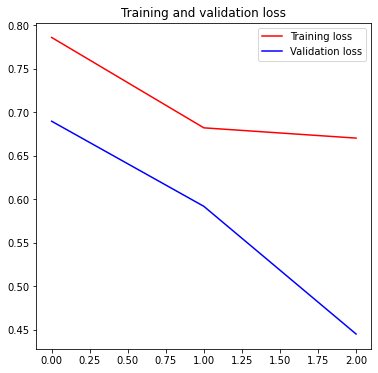

<Figure size 432x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) #covert the percentage like value of accuracy to real number for graph plotting

plt.plot(epochs, acc, 'r', label='Training accuracy') # 'r' is the color of the line
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))


plt.show()

In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape = 300, scale = True):
    # Read in image
    img = tf.io.read_file(filename)

    # Decode image into tensor
    img = tf.io.decode_image(img, channels = 3)

    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Scale? Yes or No
    if scale:
        # rescale the image (get all values between 0 and 1)
        return img/255.
    else: 
        return img # don't need to rescale images 

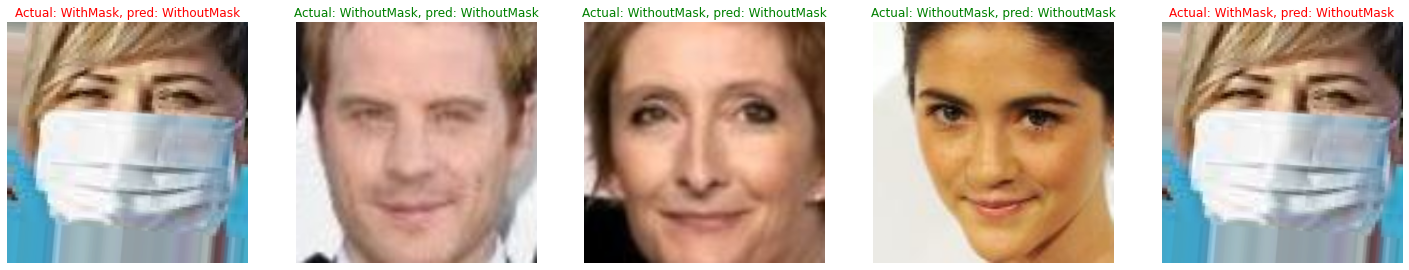

In [ ]:
import random
# Get the class names
class_names = ['WithMask', 'WithoutMask']
test_dir = r"/content/drive/MyDrive/Datasets/Face Mask Dataset/Test"
# Make preds on a series of random images
plt.figure(figsize = (25, 12))
for i in range(5):
    # Choose random image(s) from random class(es)
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + '/' + class_name)) 
    filepath = test_dir + '/' + class_name + '/' + filename

    # Load the image and make predictions
    img = load_and_prep_image(filepath, scale = False) # 
    pred_prob = model.predict(tf.expand_dims(img, axis = 0)) # get prediction probabilities array
    pred_class = class_names[pred_prob.argmax()] # get the highest prediction probability index and match it class_names list

    # Plot the image(s)
    plt.subplot(1, 5, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class: # if predicted class matches truth class, make text green
        title_color = 'g'
    else:
        title_color = 'r'
    plt.title(f'Actual: {class_name}, pred: {pred_class}', c = title_color)
    plt.axis(False);